<a href="https://colab.research.google.com/github/SidharthBhakth/Feedforward-NNs-in-TF-2.x/blob/master/2_Regression_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with ANN

Predicting the function $ y = \cos(2x_1) + cos(3x_2) $ using a fully connected feed forward neural network.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import mpl_toolkits.mplot3d as Axes3D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [0]:
# Create data
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3 and +3)
y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

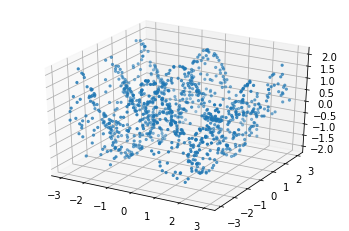

In [3]:
# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, marker='.')
plt.show()

In [4]:
# Build the model
model = Sequential([Dense(128, input_shape=(2,), activation='relu'),
                    Dense(1)])

# Compile
model.compile(optimizer=Adam(0.01), loss='mse')

# Fit
r = model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9421
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9057
Epoch 3/100
32/32 [==============================] - 0s 990us/step - loss: 0.9009
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8635
Epoch 5/100
32/32 [==============================] - 0s 989us/step - loss: 0.8125
Epoch 6/100
32/32 [==============================] - 0s 988us/step - loss: 0.7939
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7465
Epoch 8/100
32/32 [==============================] - 0s 997us/step - loss: 0.6600
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6205
Epoch 10/100
32/32 [==============================] - 0s 971us/step - loss: 0.5895
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5735
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5836
Epoch 13/100
32/32 [=======

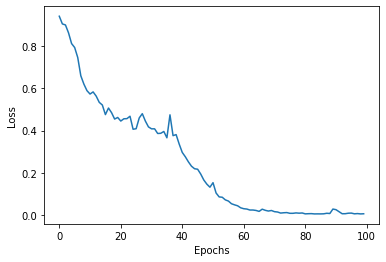

In [5]:
# Plot the loss
plt.plot(r.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

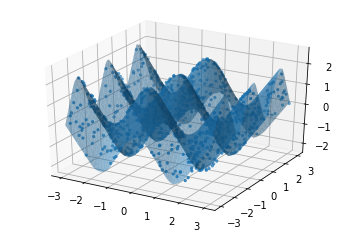

In [6]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, marker='.')

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T

# Predict
y_hat = model.predict(X_grid).flatten()

ax.plot_trisurf(X_grid[:,0], X_grid[:,1], y_hat, linewidth=0.2, alpha=0.5, antialiased=True)
plt.show()